## Данные и веса

Ссылка на веса для модели: https://pjreddie.com/media/files/yolov3.weights

Ссылка на данные COCO(2017): https://www.kaggle.com/datasets/awsaf49/coco-2017-dataset/

Ссылка на официальный сайт с COCO(2017): https://cocodataset.org/#home

## Постановка задачи

#### Защита от атак состязательными патчами на классификаторы картинок

Ваша цель — дообучить и/или встроить дополнительные механизмы в модель таким образом, чтобы она была защищена от атаки состязательными патчами. Помимо правильных предсказаний на атакованных картинках, защищенная модель должна научиться и распознавать сам факт атаки, то есть решать дополнительную задачу бинарной классификации.

Метод защиты должен представлять собой обёртку над исходной моделью (в коде это YOLOV3Multi) -- защищенную модель, с реализацией следующих методов, полностью соответствующих методам исходной модели (эти методы должны принимать на вход и выдавать на выход ровно то же самое, что и у исходной модели, но внутренности функции могут быть другие. Если вы не меняете эти функции, то они могут остаться такими же, как у исходной модели):

- forward (должен возвращать два значения: соответсвующий выходу исходной модели и в качестве второго значения вероятности для бинарной классификации)

<b>У вас есть</b>:

- код модели YOLOv3 с весами

- датасет - COCO(2017), который использовался для обучения состязательного патча

- код для датасета и датасетлоадера со всеми необходимыми функциями для датасета COCO

Можно пользоваться всеми методами из приложенных файлов.



<b>Баллы</b> выставляются за:

- наличие и корректность программной реализации защищенной модели, в которой, помимо метода предсказания меток классов должен быть метод предсказания наличия атаки
- F1-меру распознавания наличия атаки
- mAP защищенной модели, измеряемую отдельно на чистых и отдельно на атакованных тестовых примерах
- сложность и оригинальность решения
- скорость инференса итоговой модели

## Пример работы с моделью

In [97]:
import torch
import numpy as array
from PIL import Image
import requests
import numpy as np
import cv2

In [2]:
from model import YOLOV3Multi
from coco_dataset import COCODataset

Создание датасета и лоадера

In [3]:
model_type = "YOLO"
json_file_name = "instances_val2017.json"
name = "val2017"
data_path = "/Users/Ekaterina/Documents/ISPwork/coco2017"

batch_size = 5
dataset = COCODataset(model_type=model_type, data_dir=data_path, json_file=json_file_name, name=name)
loader = dataset.get_custom_loader(batch_size=batch_size, shuffle=True)

loading annotations into memory...
Done (t=0.22s)
creating index...
index created!


Создание модели с весами

In [4]:
weights = "/Users/Ekaterina/Documents/ISPwork/detection_cloak_yolo/weights/yolov3.weights"
model = YOLOV3Multi(weights=weights)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Обучение модели

In [5]:
model.train_function(loader=loader, epochs=3, batch_size=batch_size)

[defaultdict(float,
             {'xy': tensor(119.2682, grad_fn=<AddBackward0>),
              'wh': tensor(3.3199, grad_fn=<AddBackward0>),
              'conf': tensor(62.4961, grad_fn=<AddBackward0>),
              'cls': tensor(18.2088, grad_fn=<AddBackward0>),
              'l2': tensor(30.8703, grad_fn=<AddBackward0>)}),
 defaultdict(float,
             {'xy': tensor(132.4696, grad_fn=<AddBackward0>),
              'wh': tensor(5.8195, grad_fn=<AddBackward0>),
              'conf': tensor(104.8790, grad_fn=<AddBackward0>),
              'cls': tensor(32.0528, grad_fn=<AddBackward0>),
              'l2': tensor(48.3610, grad_fn=<AddBackward0>)}),
 defaultdict(float,
             {'xy': tensor(155.3078, grad_fn=<AddBackward0>),
              'wh': tensor(2.6084, grad_fn=<AddBackward0>),
              'conf': tensor(122.5839, grad_fn=<AddBackward0>),
              'cls': tensor(19.5681, grad_fn=<AddBackward0>),
              'l2': tensor(45.2745, grad_fn=<AddBackward0>)}),
 default

Предсказание на датасетлоадере

In [99]:
item = next(iter(loader))

confidence = 0.9
num_classes = 80

for j in range(len(item[0])):
    img = (item[0][j].cpu().detach().numpy().transpose(1, 2, 0) * 255).astype(np.int32)
    process_images.append(img)

image_with_prediction = model.predict(process_images, confidence=confidence, num_classes=num_classes)

k = 0
337 -1 473 476 0.9906536936759949 0
	+ Label: person, Conf: 0.99995
170 39 296 421 0.9614710211753845 0
	+ Label: person, Conf: 0.99991
216 26 332 379 0.9407633543014526 0
	+ Label: person, Conf: 0.99997
502 238 572 360 0.9984683394432068 16
	+ Label: dog, Conf: 0.99536
248 273 375 443 0.9335429668426514 36
	+ Label: skateboard, Conf: 0.99762
k = 1
217 220 429 400 0.9556698203086853 62
	+ Label: tv, Conf: 0.99636
k = 2
98 -27 454 644 0.999478280544281 23
	+ Label: giraffe, Conf: 0.99936
k = 3
15 274 104 605 0.9968950748443604 0
	+ Label: person, Conf: 0.99984
145 75 579 532 0.9280639886856079 20
	+ Label: elephant, Conf: 0.98642
k = 4
70 228 640 627 0.9957962036132812 59
	+ Label: bed, Conf: 0.98354
-2 306 500 562 0.9999396800994873 63
	+ Label: laptop, Conf: 0.98417
k = 5
320 255 655 522 0.9997813105583191 2
	+ Label: car, Conf: 0.99914
267 214 384 279 0.9998272061347961 2
	+ Label: car, Conf: 0.99659
217 235 345 324 0.9941534399986267 2
	+ Label: car, Conf: 0.99338
401 226 458 

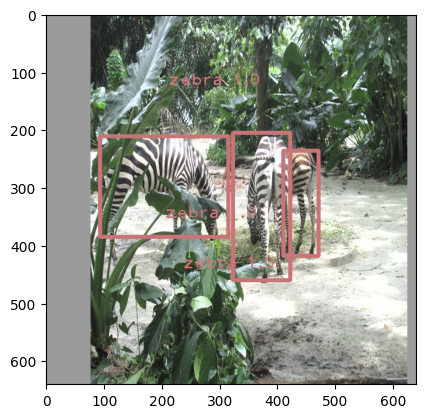

In [112]:
plt.imshow(image_with_prediction[6])